In [4]:
import re
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
def extract_info_from_directory_name(directory_name):
    pattern = re.compile(r'(SMBS|Delayed_Q|AMDP)_(\w+)-v0_d(\d+)_r(\d+\.\d{2})_(\w+)')
    match = pattern.match(directory_name)

    if match:
        method_name, environment_name, delay_steps, randomness_factor, id = match.groups()
        delay_steps = int(delay_steps)
        randomness_factor = float(randomness_factor)
        environment_name += '-v0'
        return id, method_name, environment_name, delay_steps, randomness_factor
    else:
        raise ValueError(f"Invalid directory name format: {directory_name}.")

def load_evaluation_results(directory):
    results_file = os.path.join(directory, 'eval_results2.npy')
    if os.path.exists(results_file):
        return np.load(results_file)
    else:
        return None
    
def process_logs(logs_directory):
    data = {}

    for dir_name in os.listdir(logs_directory):
        dir_path = os.path.join(logs_directory, dir_name)
        if os.path.isdir(dir_path):
            try:
                id, method, environment, delay_steps, randomness_factor = extract_info_from_directory_name(dir_name)
                environment += f"-d{delay_steps}"
            except ValueError:
                print(f"Invalid path: {dir_path}")
                continue
            if environment not in data:
                data[environment] = {'SMBS': [], "AMDP": [], 'Delayed_Q': []}

            evaluation_results = load_evaluation_results(dir_path)
            if evaluation_results is not None:
                data[environment][method].extend(evaluation_results)

    return data

def plot_evaluation_results_bar(data):
    for environment, methods in data.items():
        labels = list(methods.keys())
        means = [np.mean(methods[method]) for method in methods.keys()]

        x = np.arange(len(labels))
        width = 0.35

        fig, ax = plt.subplots()
        rects = ax.bar(x, means, width, label='Mean Evaluation Results')

        ax.set_ylabel('Scores')
        ax.set_title(f'Evaluation Results for {environment}')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        plt.show()
        
def plot_evaluation_results_box(data):
    for environment, methods in data.items():
        labels = list(methods.keys())
        results = [methods[method] for method in methods.keys()]

        fig, ax = plt.subplots()
        ax.boxplot(results, labels=labels)
        ax.set_ylabel('Scores')
        ax.set_title(f'Evaluation Results for {environment}')

        plt.show()
        
def plot_evaluation_results_bar_together(data):
    for environment, methods in data.items():
        labels = list(methods.keys())
        means = [np.mean(methods[method]) for method in methods.keys()]

        x = np.arange(len(labels))
        width = 0.35

        fig, ax = plt.subplots()
        rects = ax.bar(x, means, width, label='Mean Evaluation Results')

        ax.set_ylabel('Scores')
        ax.set_title(f'Evaluation Results for {environment}')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        plt.show()

In [6]:
logs_directory = 'logs_new2/'  # Path to your logs directory
evaluation_data = process_logs(logs_directory)
# plot_evaluation_results_bar(evaluation_data)

Invalid path: logs_new2/wandb


In [7]:
evaluation_data.keys()

dict_keys(['TimePilot-v0-d15', 'StarGunner-v0-d25', 'Freeway-v0-d25', 'TimePilot-v0-d25', 'MsPacman-v0-d5', 'Zaxxon-v0-d25', 'StarGunner-v0-d15', 'MsPacman-v0-d25', 'MsPacman-v0-d15', 'RoadRunner-v0-d5', 'RoadRunner-v0-d25', 'Zaxxon-v0-d5', 'StarGunner-v0-d5', 'NameThisGame-v0-d25', 'Freeway-v0-d5', 'Qbert-v0-d5', 'RoadRunner-v0-d15', 'Freeway-v0-d15', 'TimePilot-v0-d5', 'NameThisGame-v0-d5', 'Qbert-v0-d15', 'NameThisGame-v0-d15', 'Qbert-v0-d25', 'Zaxxon-v0-d15'])

NameError: name 'OAS' is not defined

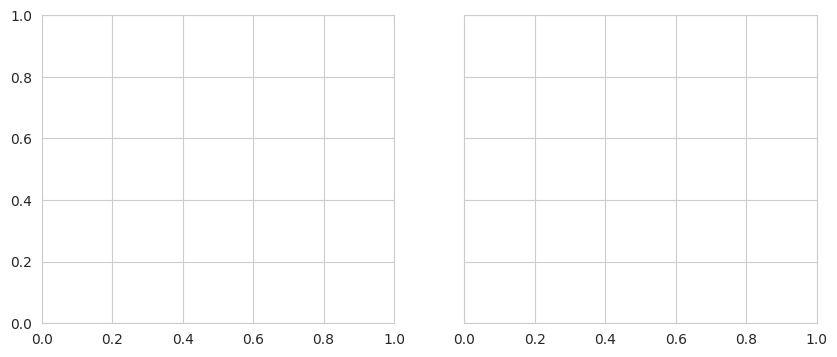

In [8]:

import seaborn as sns
from matplotlib.lines import Line2D
import os
import joblib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
sns.set_style(style = "whitegrid")
# convergent plot

fig, axes = plt.subplots(1,2, sharex = True, sharey = True, figsize=(10, 4), dpi=100)
font_size = 22
colors = sns.color_palette()
use_true = False
save = False
fig_label = 97

for idx, delay_step in  enumerate([5, 25]):
    # j,i = idx%, idx//3
    # ax = axes[i, j] #
    ax = axes[idx]


    label_oas = 'SMBS'
    label_mbs = 'Delayed-Q'
    label_dq = 'AMDP'

    


    def draw_barplot(data, offset,edge_color,hatch, fill_color, ax, label):
        pos = np.arange(data.shape[1])+offset 
        # print(pos, data.shape)

        flierprops = dict(marker='o', markerfacecolor='white', markersize=2,
                      linestyle='none', markeredgecolor=edge_color)
        # bp = ax.boxplot(data, positions= pos, widths=0.15, 
        #                 patch_artist=True, flierprops = flierprops)
        bp = ax.bar(pos,data.mean(axis = 0),  width=0.15, color = edge_color, hatch = hatch, label = label)


    # fig = figure(figsize=(8, 6), dpi=100)
    # ax = plt.axes()
    
    draw_plot = draw_barplot

    c1, c2, c3 = colors[0:3]
    hatches = ['...', '///', r"\ "]
    
    draw_plot(OAS, -0.2,c2, hatches[0], "white", ax, "SMBS")
    draw_plot(dQ, +0.,c1,hatches[1], "white", ax, "AMDP")
    draw_plot(MBS, +0.2,c3,hatches[2], "white", ax, "Delayed-Q")
    

    

    # ax.xaxis.set_ticks(range(4))

    ax.set_xlabel('Delay Steps', fontdict = {'fontsize' : font_size})
    if idx == 0: ax.set_ylabel("Avg. Reward", fontdict = {'fontsize' : font_size})

    ax.set_title(f"({chr(fig_label)}) $r=$ {rnd_factor}", fontdict = {'fontsize' : font_size})
    fig_label += 1
    ax.tick_params(labelsize=font_size-4)
# plt.ylim(-0.05, 1.05)
plt.xticks(ticks = range(0, len(delays), 1), labels = delays)
# axes[0][-1].set_xlabel('Delay Steps', fontdict = {'fontsize' : font_size})
# axes[0][-1].tick_params(labelsize=font_size-4,labelbottom=True)
# axes[-1][-1].axis("off")  
# axes[-1][-1].legend([Line2D([0], [0], color=c1, lw=2),
#            Line2D([0], [0], color=c2, lw=2), 
#           Line2D([0], [0], color=c3, lw=2)],
#           ['SMBS', 'AMDP', 'Delayed-Q'],
#           loc = 10, prop={"size":font_size+4})
fig.tight_layout()

# plt.show()
# plt.savefig(f'../img/magcar_hist_boxplots_rf{rnd_factor}_trueModel{use_true}_merged.png', dpi=100)
# plt.savefig(f'./fl_barplots_merged_ral.png', dpi=100)

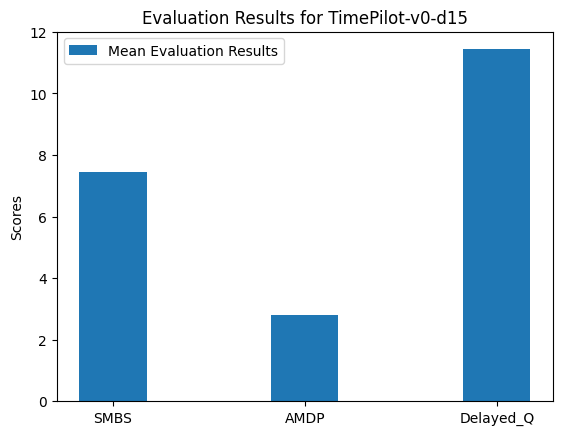

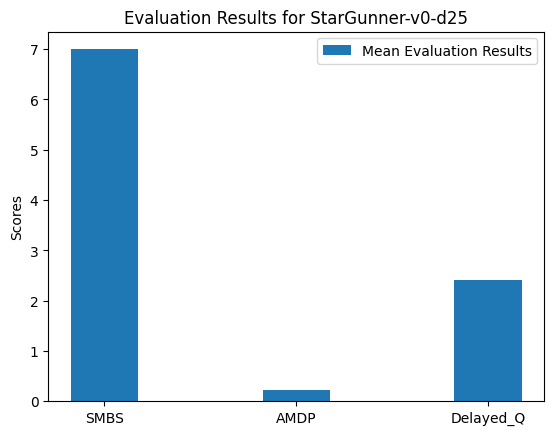

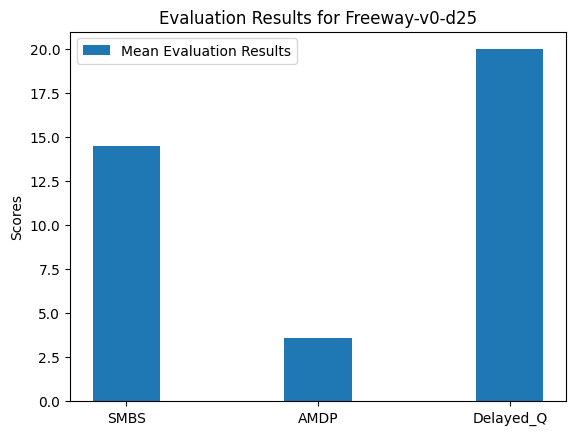

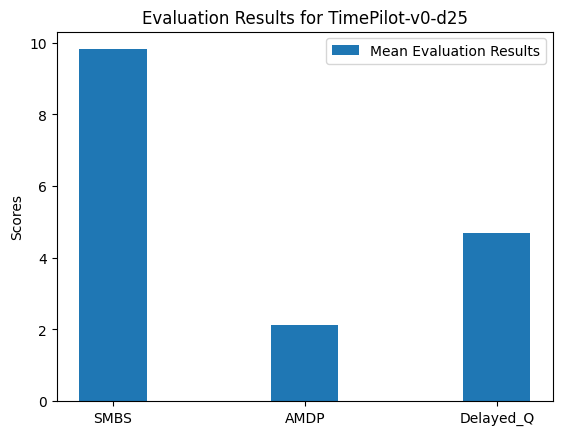

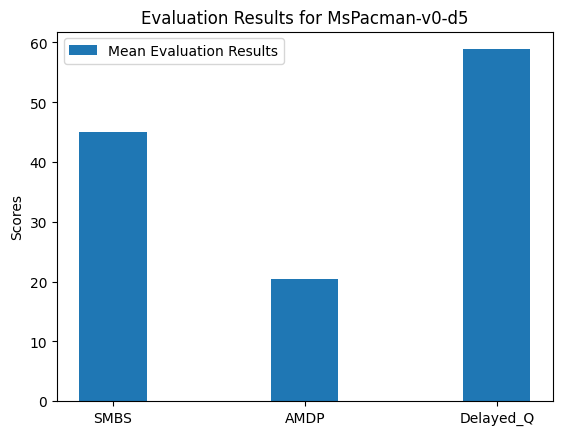

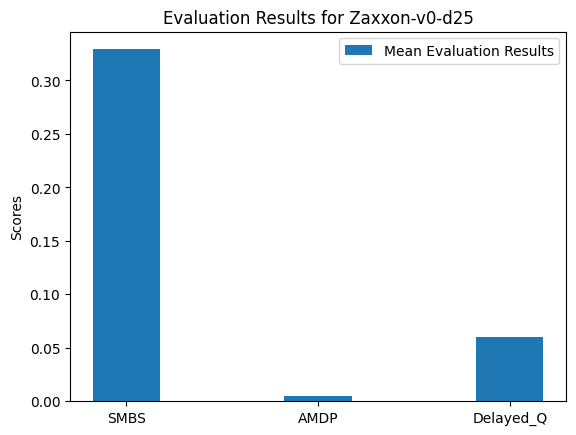

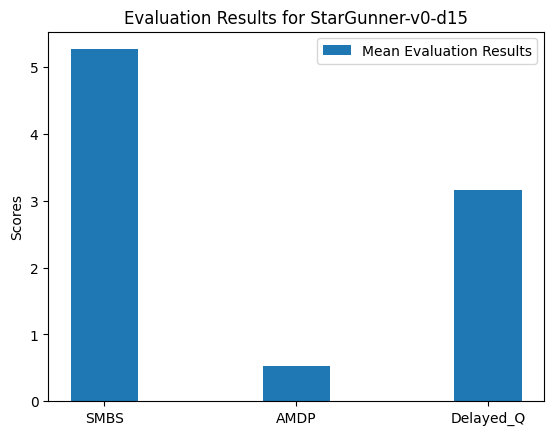

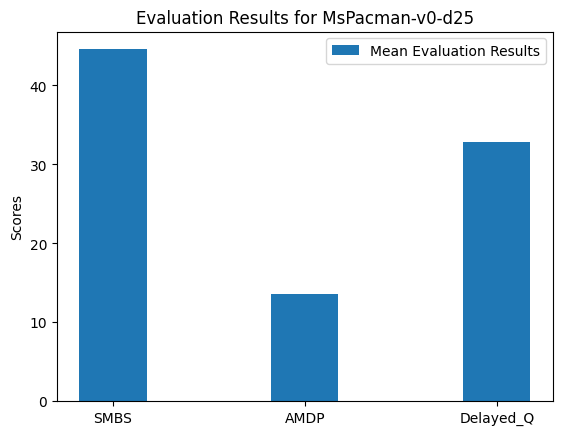

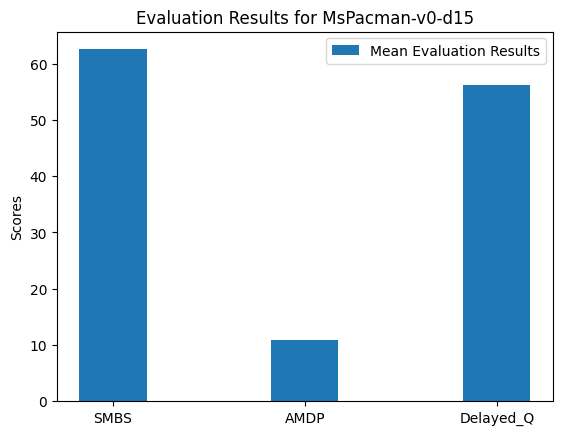

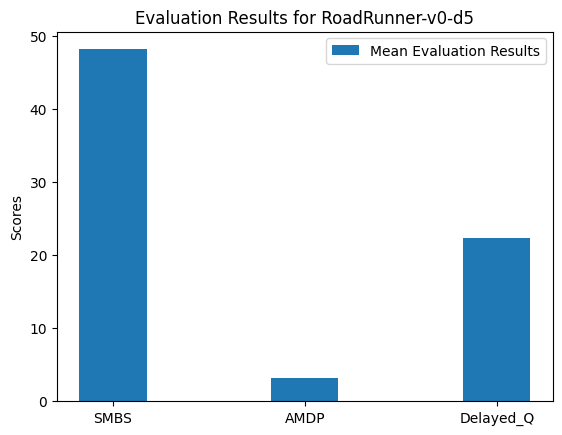

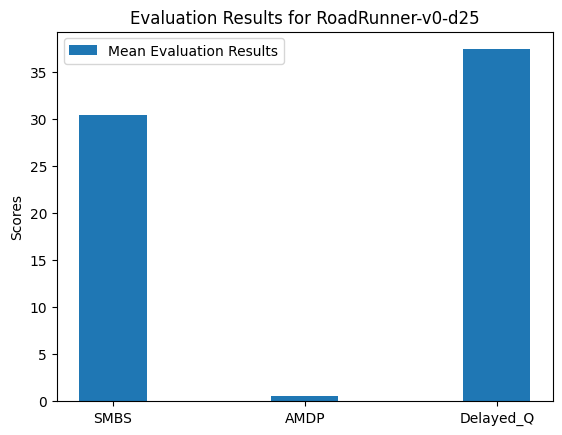

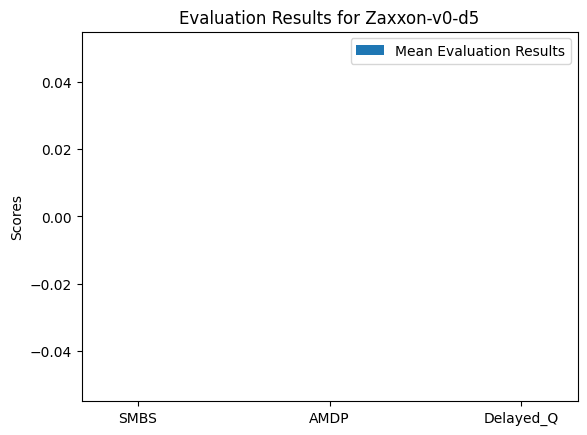

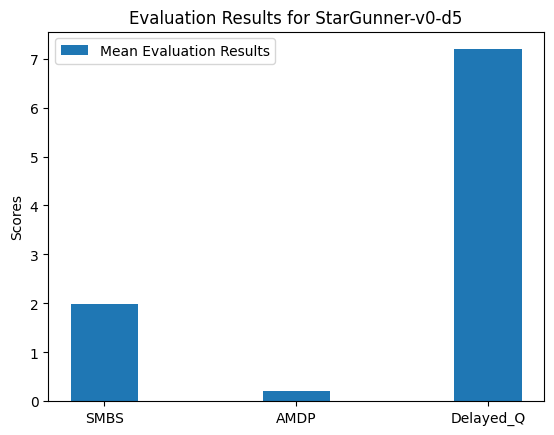

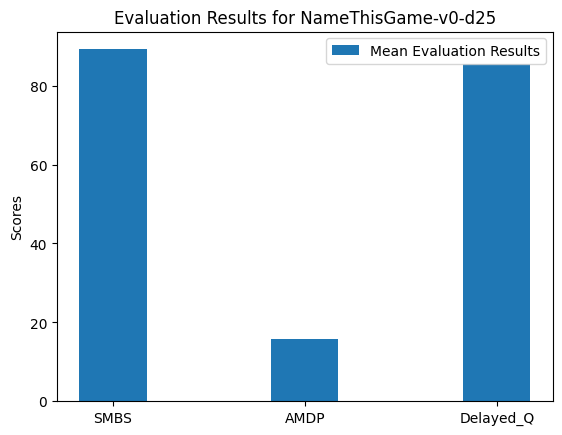

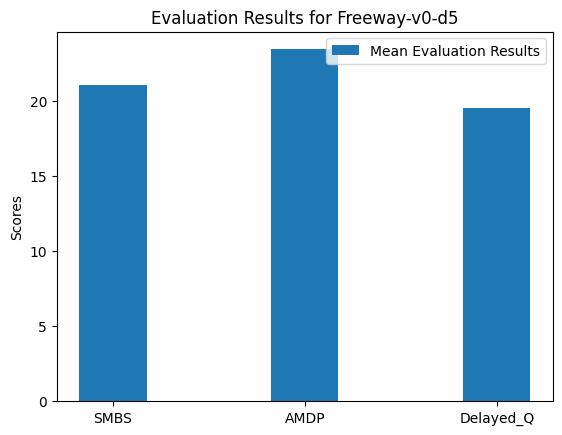

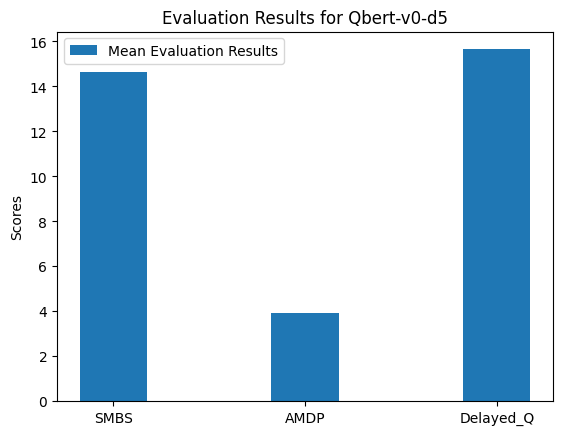

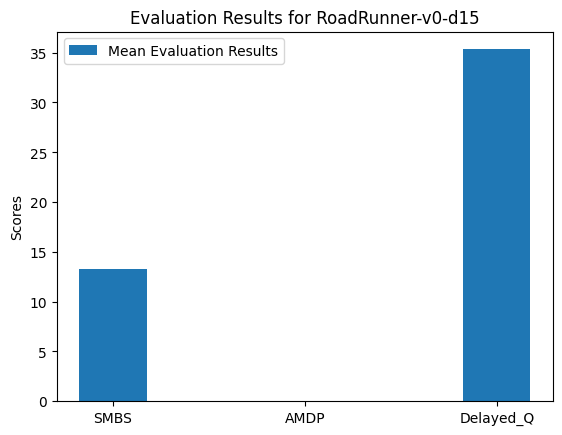

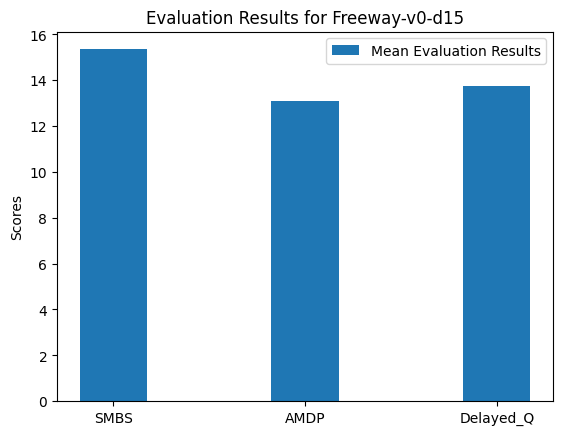

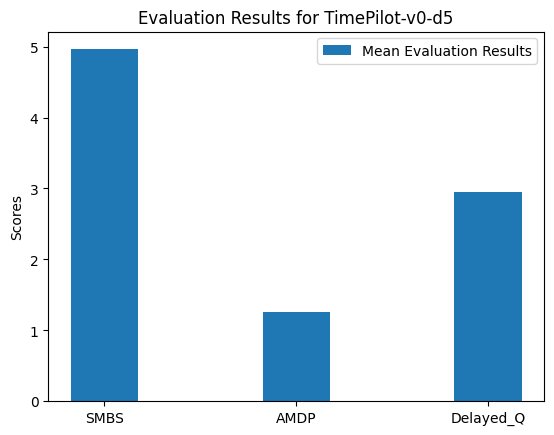

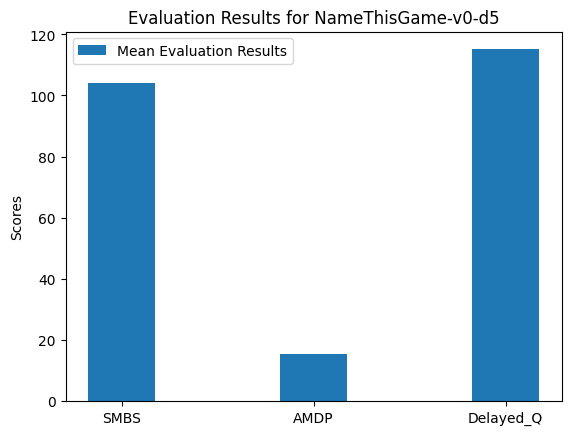

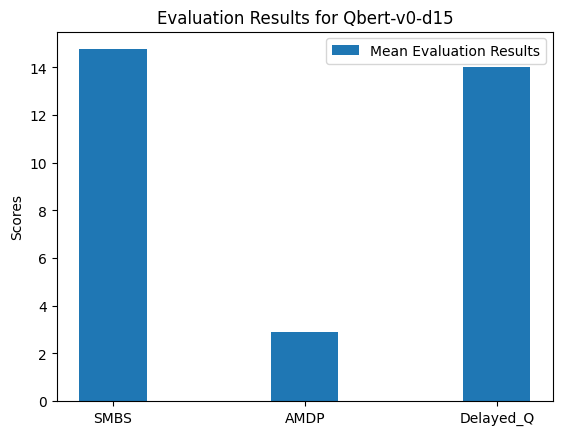

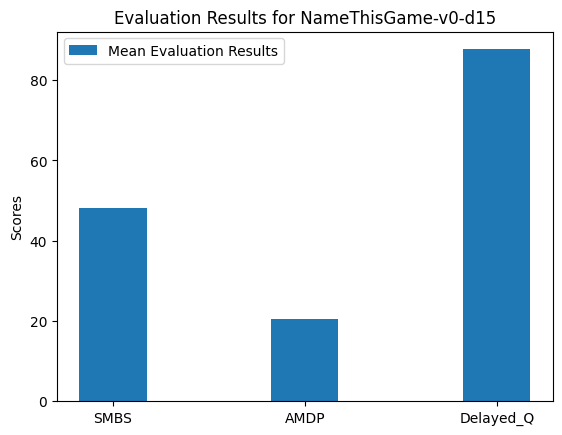

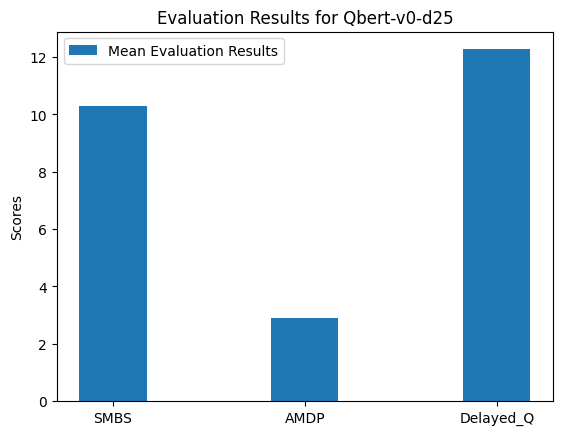

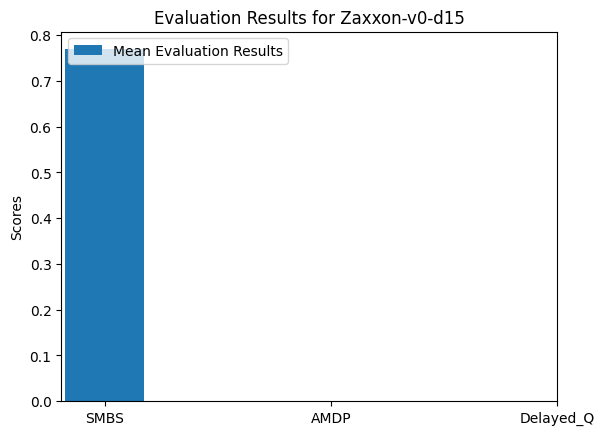

In [ ]:
plot_evaluation_results_bar(evaluation_data)

['Freeway-v0-d15', 'MsPacman-v0-d15', 'NameThisGame-v0-d15', 'Qbert-v0-d15', 'RoadRunner-v0-d15', 'StarGunner-v0-d15', 'TimePilot-v0-d15']
['Freeway-v0-d25', 'MsPacman-v0-d25', 'NameThisGame-v0-d25', 'Qbert-v0-d25', 'RoadRunner-v0-d25', 'StarGunner-v0-d25', 'TimePilot-v0-d25']


/home/hfsladmin/miniconda3/envs/rl_delay_atari/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.


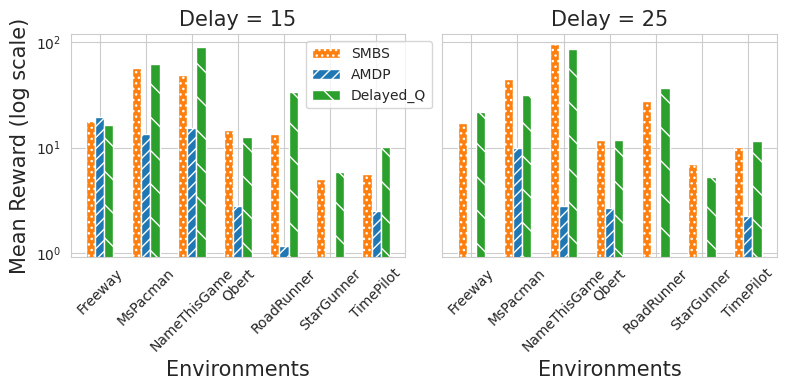

In [9]:
# import seaborn as sns
fig, axes = plt.subplots(1,2, sharex = True, sharey = True, figsize=(8, 4), dpi=100)
font_size = 15
for idx, dv in enumerate([15, 25]):
    # Prepare data for plotting
    ax = axes[idx]
    
    environments = [env for env in evaluation_data.keys() if f"d{dv}" in env and "Zaxxon" not in env]
    environments = sorted(environments)
    print(environments)
    methods = list(evaluation_data[environments[0]].keys())

    bar_width = 0.2
    x = np.arange(len(environments))

    # colors = ['skyblue', 'salmon', 'lightgreen']  # Different colors for bars

    colors = [sns.color_palette()[1], sns.color_palette()[0], sns.color_palette()[2]]
    hatches = ['...', '///', r"\ "]
    # Create a bar plot
    for i, method in enumerate(methods):
        mean_values = [np.mean(evaluation_data[env][method]) for env in environments]
        ax.bar(x + i * bar_width, mean_values, width=bar_width, label=method, color=colors[i], hatch = hatches[i])

    ax.set_xlabel('Environments', fontdict = {'fontsize' : font_size})
    # ax.set_ylabel('Mean Reward')
    ax.set_title(f'Delay = {dv}', fontdict = {'fontsize' : font_size})
    ax.set_xticks(x + bar_width,[env[:env.find("-")] for env in environments], rotation=45)
    # ax.set_xticks(x + bar_width, environments.copy(), rotation = 45)
axes[0].set_ylabel('Mean Reward (log scale)',  fontdict = {'fontsize' : font_size})
plt.yscale('log')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1.), prop={"size":font_size-5})
plt.tight_layout()

# plt.show()

In [4]:
import gym

env = gym.make("Freeway-v0")

env.reset()

env.render()

NoSuchDisplayException: Cannot connect to "None"